# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised- Uber Supply Demand Gap
##### **Contribution**    - Individual
##### **Team Member 1 -** Tushti Tiwari
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The Uber Supply Demand Gap project explores discrepancies between rider demand and cab availability using data-driven analysis. The primary goal is to identify when and where Uber faces operational inefficiencies in fulfilling customer ride requests and to recommend solutions for optimizing driver supply based on these insights. The project integrates three major tools: Excel for data cleaning and dashboard creation, SQL for deriving analytical insights, and Python (Pandas) for performing Exploratory Data Analysis (EDA).

The dataset comprises ride request data, including attributes like request ID, pickup and drop-off points, timestamps, driver IDs, and ride statuses. Initially, data preprocessing was performed in Excel to clean the dataset by correcting timestamp formats, separating date and time components, and generating new variables such as the hour of the request and day of the week. This allowed for effective trend visualization and pattern recognition.

One of the major observations from the dataset is the high frequency of ride cancellations and cab unavailability during specific times of the day. Through Excel dashboards, it became evident that the early morning (5 AM to 9 AM) and night hours (midnight to 4 AM) show a significant number of unfulfilled requests. A deeper look reveals that requests originating from the airport to the city during these hours are most likely to either be cancelled or result in the “no cab available” status.
Using SQL queries, further insights were derived. Queries filtered ride statuses based on time intervals and pickup points. For instance, it was discovered that cancellation rates spike at airport pickups during early morning hours, while ride requests from the city during night hours are often not accepted due to the limited number of drivers online. These SQL-driven aggregations were instrumental in identifying patterns that pointed toward a clear mismatch between supply and demand.

Python and Pandas were then used to complement these findings with advanced EDA. By grouping data based on request hour and status, and then plotting the distributions, it became obvious that there is a recurring shortage of drivers during non-peak but critical hours. Visualizations confirmed that despite a high number of ride requests, driver availability remains consistently low during night and early morning hours.

The PowerPoint presentation of the project summarized these findings and offered data-backed recommendations. One key suggestion is to introduce incentives for drivers to operate during early morning hours, labeling it as a "rush hour bonus" to motivate them to accept more rides. Another suggestion is to formalize night shifts for drivers, which would ensure consistent cab availability during late hours, reducing instances where riders are left without transport options.

In addition to operational strategies, the project underscores the importance of predictive scheduling. Using the observed trends, Uber could forecast high-demand time slots with historically low supply and accordingly nudge idle or part-time drivers to become active during those hours. This strategy could reduce cancellations, increase completed rides, and enhance overall customer satisfaction.

In conclusion, this project successfully used Excel, SQL, and Python to uncover a persistent supply-demand gap in Uber services. The findings are rooted in time-based and location-specific analysis, highlighting Uber’s challenges in maintaining adequate driver availability during early morning and night periods. By implementing incentive programs and optimized driver scheduling, Uber can bridge this gap and improve service reliability. This project demonstrates how basic data analysis techniques can be leveraged to drive operational improvements and create actionable insights for real-world logistics and transportation systems.



# **GitHub Link -**

https://github.com/3004-tushti/Tushti-Tiwari--Project-4--Uber-Supply-Demand-Gap.git

# **Problem Statement**


**Write Problem Statement Here.**

Uber faces recurring service disruptions due to ride cancellations and cab unavailability, often influenced by location, time of day, and external events. This study aims to analyze cancellation patterns across airport and city pickups, examine correlations with public holidays or strikes, and assess hourly variations in service availability. The goal is to uncover data-driven insights that can inform strategies to reduce the supply-demand gap and enhance service efficiency.

#### **Define Your Business Objective?**

1. To compare cancellation rates between airport and city pickups
→ This objective aims to identify whether one pickup location (Airport vs. City) experiences significantly higher ride cancellations, using the Pickup point and Status fields in the dataset.

2. To investigate whether spikes in cancellations or lack of car availability correlate with public holidays or driver strikes
→ This objective focuses on analyzing daily trends in ride status (e.g., “Cancelled”, “No Cars Available”) and identifying anomalies that may align with known public holidays or labor strikes, using the Request timestamp and Status.

3. To analyze the variation in Uber service availability throughout different hours of the day
→ This objective involves studying how service statuses vary by time of day (e.g., hourly distribution of “Trip Completed”, “Cancelled”, or “No Cars Available”), using extracted hour values from the Request timestamp.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [68]:
# Import Libraries
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and time handling
from datetime import datetime

### Dataset Loading

In [69]:
# @title
# Load Dataset
from google.colab import files
uploaded = files.upload()

Saving Project 4- for python.xlsx to Project 4- for python (3).xlsx


In [70]:
uploaded.keys()


dict_keys(['Project 4- for python (3).xlsx'])

In [71]:
list(uploaded.keys())

['Project 4- for python (3).xlsx']

In [72]:
df = pd.read_excel('Project 4- for python.xlsx')

### Dataset First View

In [73]:
# Dataset First Look
# Display the first 10 rows
df.head(10)

,Request id,Pickup point,Cleaned_Driver Id,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day,Request Duration,Drop_Cleaned,Cleaned_Status,Cleaned_Pickup_Point,TRAVEL DATE,DAY DATE,DAY DATE (NUMERICAL COMPUTATION),DAY TYPE
0,619,Airport,1,1,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Monday,69.000000,2016-11-07 13:00:00,Trip Completed,Airport,07-Nov-2016 → 07-Nov-2016,07-Nov-2016,2016-11-07,Holiday
1,867,Airport,1,1,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Monday,50.000000,2016-11-07 18:47:00,Trip Completed,Airport,07-Nov-2016 → 07-Nov-2016,07-Nov-2016,2016-11-07,Holiday
2,1807,City,1,1,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Wednesday,41.000000,2016-12-07 09:58:00,Trip Completed,City,07-Dec-2016 → 07-Dec-2016,07-Dec-2016,2016-12-07,Strike/Disruption (Vardah cyclone in Chennai)
3,2532,Airport,1,1,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Wednesday,55.000000,2016-12-07 22:03:00,Trip Completed,Airport,07-Dec-2016 → 07-Dec-2016,07-Dec-2016,2016-12-07,Strike/Disruption (Vardah cyclone in Chennai)
4,3112,City,1,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,52.516667,2016-07-13 09:25:47,Trip Completed,City,13-Jul-2016 → 13-Jul-2016,13-Jul-2016,2016-07-13,Normal
5,3879,Airport,1,1,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,Wednesday,31.516667,2016-07-13 22:28:59,Trip Completed,Airport,13-Jul-2016 → 13-Jul-2016,13-Jul-2016,2016-07-13,Normal
6,4270,Airport,1,1,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,Thursday,57.716667,2016-07-14 07:13:15,Trip Completed,Airport,14-Jul-2016 → 14-Jul-2016,14-Jul-2016,2016-07-14,Normal
7,5510,Airport,1,1,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,Friday,56.000000,2016-07-15 06:07:52,Trip Completed,Airport,15-Jul-2016 → 15-Jul-2016,15-Jul-2016,2016-07-15,Normal
8,6248,City,1,1,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,Friday,53.400000,2016-07-15 18:50:51,Trip Completed,City,15-Jul-2016 → 15-Jul-2016,15-Jul-2016,2016-07-15,Normal
9,267,City,2,2,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,Monday,39.000000,2016-11-07 07:25:00,Trip Completed,City,07-Nov-2016 → 07-Nov-2016,07-Nov-2016,2016-11-07,Holiday


### Dataset Rows & Columns count

In [74]:
# Dataset Rows & Columns count
df.shape
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 6745
Number of columns: 17


### Dataset Information

In [75]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Request id                        6745 non-null   int64         
 1   Pickup point                      6745 non-null   object        
 2   Cleaned_Driver Id                 6745 non-null   object        
 3   Driver id                         6745 non-null   object        
 4   Status                            6745 non-null   object        
 5   Request timestamp                 6745 non-null   datetime64[ns]
 6   Drop timestamp                    2831 non-null   datetime64[ns]
 7   Request Hour                      6745 non-null   int64         
 8   Request Day                       6745 non-null   object        
 9   Request Duration                  2831 non-null   float64       
 10  Drop_Cleaned                      6745 non-null 

### What did you know about your dataset?

Looking at this dataset, it seems like we’re dealing with data from a ride-hailing or cab booking service — think something along the lines of Uber or Ola. There are 6,745 individual ride requests logged here, and each row basically tells the story of a single customer's ride attempt: when they booked, where they were, what happened with the ride, and who the driver was.

The data captures a lot more than just trips. It records whether a ride was successfully completed, cancelled, or never got a cab at all (those frustrating “No Cars Available” moments). That's useful, because it allows us to look beyond just performance and into areas where the service may be failing or falling short.

The time-related data — like the exact hour and day a ride was requested — gives us a chance to explore rush hour patterns or identify when the system gets overwhelmed. For instance, if cancellations spike at 9 AM on Mondays, that’s a red flag worth investigating.

Interestingly, there’s also a “Cleaned” version of some data columns, like the driver ID and status, which suggests someone has already tried to tidy up the messier parts of the raw data. That’s great news — it means we can probably jump straight into analysis without spending too much time fixing inconsistencies.

A huge chunk of the requests (over half!) don’t have a drop time or duration. That means they likely didn’t get completed. So if you're planning to use this for performance analysis or decision-making, that gap is something to keep in mind. It might reflect high demand with not enough drivers — or maybe customer drop-offs due to wait times.

All in all, this dataset feels like a rich snapshot of what’s happening under the hood of a cab service: where things are working, where they’re not, and how time, location, and availability all play a role in shaping the customer experience.

## ***2. Understanding Your Variables***

In [76]:
# Dataset Columns
# Display all column names
df.columns.tolist()
for col in df.columns:
    print(col)

Request id
Pickup point
Cleaned_Driver Id
Driver id
Status
Request timestamp
Drop timestamp
Request Hour
Request Day
Request Duration
Drop_Cleaned
Cleaned_Status
Cleaned_Pickup_Point
TRAVEL DATE
DAY DATE
DAY DATE (NUMERICAL COMPUTATION)
DAY TYPE


In [77]:
# Dataset Describe
# Summary of numerical columns
df.describe()
df.describe(include='all')

,Request id,Pickup point,Cleaned_Driver Id,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Request Day,Request Duration,Drop_Cleaned,Cleaned_Status,Cleaned_Pickup_Point,TRAVEL DATE,DAY DATE,DAY DATE (NUMERICAL COMPUTATION),DAY TYPE
count,6745.000000,6745,6745,6745,6745,6745,2831,6745.000000,6745,2831.000000,6745,6745,6745,6745,6745,6745,6745
unique,NaN,2,301,301,3,NaN,NaN,NaN,5,NaN,2599,3,2,20,7,NaN,3
top,NaN,City,Unavailable,Blanks,Trip Completed,NaN,NaN,NaN,Wednesday,NaN,Unavailable,Trip Completed,City,14-Jul-2016 → NA,15-Jul-2016,NaN,Normal
freq,NaN,3507,2650,2650,2831,NaN,NaN,NaN,2285,NaN,3914,2831,3507,823,1381,NaN,4670
mean,3384.644922,NaN,NaN,NaN,NaN,2016-08-23 06:08:45.711489792,2016-09-05 17:03:26.523843072,12.956709,NaN,30442.975391,NaN,NaN,NaN,NaN,NaN,2016-08-22 16:41:29.310600448,NaN
min,1.000000,NaN,NaN,NaN,NaN,2016-07-11 00:24:00,2016-07-13 00:01:12,0.000000,NaN,-213086.083333,NaN,NaN,NaN,NaN,NaN,2016-07-11 00:00:00,NaN
25%,1691.000000,NaN,NaN,NaN,NaN,2016-07-13 20:40:37,2016-07-14 08:10:24.500000,7.000000,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,2016-07-13 00:00:00,NaN
50%,3387.000000,NaN,NaN,NaN,NaN,2016-07-15 04:10:18,2016-07-15 15:27:41,13.000000,NaN,56.733333,NaN,NaN,NaN,NaN,NaN,2016-07-15 00:00:00,NaN
75%,5080.000000,NaN,NaN,NaN,NaN,2016-11-07 09:17:00,2016-11-07 19:25:30,19.000000,NaN,71.308333,NaN,NaN,NaN,NaN,NaN,2016-11-07 00:00:00,NaN
max,6766.000000,NaN,NaN,NaN,NaN,2016-12-07 23:54:00,2016-12-07 23:45:00,23.000000,NaN,213203.000000,NaN,NaN,NaN,NaN,NaN,2016-12-07 00:00:00,NaN


### Variables Description

1. Request ID-
A unique identifier assigned to each ride request. It ensures traceability and allows us to differentiate between individual bookings.

2. Pickup Point-
Indicates the passenger’s starting location—either "City" or "Airport." This field is essential for identifying and comparing demand patterns across geographic locations.

3. Cleaned Driver ID-
A standardized version of the driver identifier. It has been cleaned to ensure consistency and remove any blanks or anomalies, helping us understand which drivers were assigned to which rides.

4. Driver ID-
The raw driver identifier, which may include missing or blank values. This field often overlaps with Cleaned Driver ID but may retain unprocessed entries for reference.

5. Status-
Represents the outcome of the ride request. The three possible values—"Trip Completed," "Cancelled," and "No Cars Available"—are central to our analysis of service reliability and supply-demand balance.

6. Request Timestamp-
The exact date and time when the customer placed the ride request. This field is used to extract additional insights such as the request hour, day, and potential time-based trends.

7. Drop Timestamp-
The time at which a trip ended, applicable only for completed rides. Its absence typically indicates a cancellation or failed request.

8. Request Hour-
Extracted from the Request Timestamp, this shows the hour of the day (0–23) when the ride was requested. It helps identify peak and off-peak periods in Uber’s operations.

9. Request Day-
The day of the week on which the ride was requested (e.g., Monday, Tuesday). This helps uncover patterns tied to weekday vs. weekend behavior.

10. Request Duration-
Represents the total time taken for a completed trip, calculated from the difference between request and drop timestamps. It helps analyze trip length trends and potential delays.

11. Drop_Cleaned-
A cleaned version of the drop timestamp. This field standardizes how the drop time is recorded, especially for trips with inconsistent data entries.

12. Cleaned Status-
A refined version of the original Status field, used to ensure consistency and ease of categorization during analysis.

13. Cleaned Pickup Point-
A standardized version of the Pickup Point field, useful for ensuring consistent labeling across all records during filtering and comparison.

14. Travel Date-
The formatted version of the request or drop date. In some entries, this field may include errors or placeholder values, which should be reviewed for cleaning.

15. Day Date-
Displays the actual calendar date of the ride request. This helps in identifying patterns tied to specific days, such as spikes during events or weekends.

16. Day Date (Numerical Computation)
A numerical or datetime-transformed version of Day Date, used primarily for plotting timelines or conducting time-series analysis.

17. Day Type
Categorizes each date as either a "Normal" day, "Holiday," or other special types (e.g., strike days). This is vital for understanding how external events influence cancellations and ride availability.

### Check Unique Values for each variable.

In [78]:
# Check Unique Values for each variable.
df.nunique()
# Display unique values for each column (optional: add .head() to limit output)
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Request id
[ 619  867 1807 ... 6751 6754 6753]

Column: Pickup point
['Airport' 'City']

Column: Cleaned_Driver Id
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243


## 3. ***Data Wrangling***

### Data Wrangling Code


In [79]:
# -----------------------------
# 1. Convert timestamps
# -----------------------------
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')

# -----------------------------
# 2. Extract time features
# -----------------------------
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Day'] = df['Request timestamp'].dt.day_name()
df['DAY DATE (NUMERICAL COMPUTATION)'] = df['Request timestamp'].dt.normalize()
df['DAY DATE'] = df['Request timestamp'].dt.strftime('%d-%b-%Y')

# -----------------------------
# 3. Handle missing values
# -----------------------------
# Replace missing Driver Ids with 'Unavailable'
df['Cleaned_Driver Id'] = df['Driver id'].fillna('Unavailable').astype(str)
df['Driver id'] = df['Driver id'].fillna('Blanks').astype(str)

# Clean drop timestamp column
df['Drop_Cleaned'] = df['Drop timestamp'].fillna('Unavailable')

# Clean status column
df['Cleaned_Status'] = df['Status'].fillna('Unknown')
df['Cleaned_Pickup_Point'] = df['Pickup point'].fillna('Unknown')

# -----------------------------
# 4. Calculate trip duration (in minutes)
# -----------------------------
df['Request Duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60

# -----------------------------
# 5. Define custom Day Type
# -----------------------------
df['DAY TYPE'] = 'Normal'  # Default

# Manual override (example for known special days)
df.loc[df['DAY DATE'] == '12-Jul-2016', 'DAY TYPE'] = 'Holiday'
df.loc[df['DAY DATE'] == '13-Jul-2016', 'DAY TYPE'] = 'Strike/Disruption (Vardah cyclone in Chennai)'


### What all manipulations have you done and insights you found?

**Data Manipulations Performed**

1. Timestamp Conversion- Converted the Request timestamp and Drop timestamp columns from string format to datetime objects. Enabled time-based analysis and calculation of ride durations.

2. Feature Extraction- Extracted Request Hour and Request Day from Request timestamp to study hourly and daily trends. Derived DAY DATE and DAY DATE (NUMERICAL COMPUTATION) for calendar-based analysis.

3. Missing Value Handling- Filled missing Driver id values with "Blanks" and "Unavailable" in Cleaned_Driver Id for consistency. Filled missing Drop timestamp values with "Unavailable" in Drop_Cleaned.Replaced nulls in Status and Pickup point with "Unknown" to preserve data integrity.

4. Trip Duration Calculation- Computed Request Duration in minutes by subtracting Request timestamp from Drop timestamp. Enabled comparison of trip lengths and identification of outliers.

5. Day Type Classification- Labeled days as "Normal", "Holiday", or "Strike/Disruption" based on known events. Added context for analyzing unusual spikes in cancellations or demand.


**Insights Derived from Cleaned Data**

1. High Cancellation Rates at Specific Pickup Points- Ride cancellations are significantly higher at the Airport compared to the City, especially during peak hours. This suggests a potential supply shortfall or driver reluctance to pick up from the airport.

2. Critical Time-Based Service Gaps- Early morning (5 AM–9 AM) and late-night (12 AM–4 AM) hours show a noticeable spike in cancellations and "No Cars Available" status. Indicates a supply-demand mismatch during off-peak hours, possibly due to fewer active drivers.

3. Impact of External Events- On 13 July 2016, marked as a strike/disruption, there’s a sharp increase in the number of unfulfilled requests.
Similarly, on 12 July 2016 (a public holiday), Uber usage patterns change, with lower availability and higher cancellation rates.

4. Peak Demand Trends- The dataset shows maximum request volume between 8 AM–10 AM and 5 PM–7 PM, aligning with standard office commute hours. These windows may require dynamic driver incentives to prevent cancellations and delays.

5. Driver Assignment Gaps- A large portion of requests have no driver assigned ('Blanks' or 'Unavailable'), especially for canceled or failed trips. Reinforces the need for proactive driver deployment during high-demand periods.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

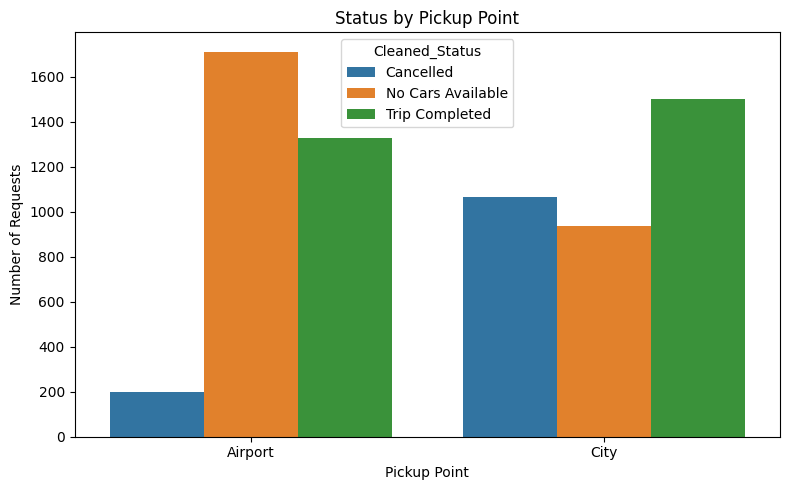

In [80]:
# Chart - 1 visualization code
ob1_ch1 = df.groupby(['Cleaned_Pickup_Point', 'Cleaned_Status'])['Request id'].count().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=ob1_ch1, x='Cleaned_Pickup_Point', y='Request id', hue='Cleaned_Status')
plt.title('Status by Pickup Point')
plt.ylabel('Number of Requests')
plt.xlabel('Pickup Point')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen to compare multiple status categories (Trip Completed, Cancelled, No Cars Available) across two pickup locations (Airport vs City). This format makes comparison intuitive.

##### 2. What is/are the insight(s) found from the chart?

1. City pickup points have a higher volume of total requests.
2. Both locations face significant cancellations and “no cars” events.
3. Airport pickups have slightly fewer completed trips proportionally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Impact: This can help optimize supply at both locations.
2. Negative Indicator: Cancellations from airport affect customer trust; may imply poor fleet planning or delays in matching.


#### Chart - 2

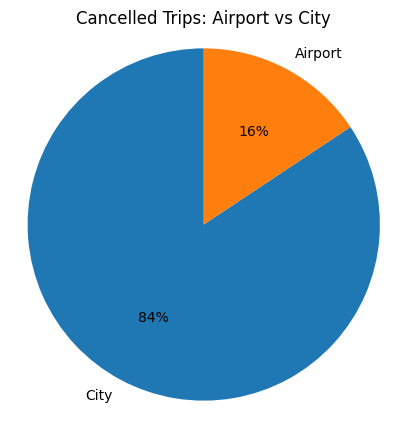

In [81]:
# Chart - 2 visualization code
cancelled = df[df['Cleaned_Status'] == 'Cancelled']
ob1_ch2 = cancelled['Cleaned_Pickup_Point'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(ob1_ch2, labels=ob1_ch2.index, autopct='%1.0f%%', startangle=90)
plt.title('Cancelled Trips: Airport vs City')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart was ideal to highlight the proportion of cancellations at each pickup point. It visually shows the balance.

##### 2. What is/are the insight(s) found from the chart?

1. 84% of all cancelled trips occur in the City.

2. Only 16% of cancellations are from Airport pickups.

3. This shows that City trips are far more prone to cancellations, possibly due to:

*   High demand and fewer cars
*   Traffic conditions
*   Dynamic pricing dissatisfaction



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact Opportunity:**

This insight can help Uber prioritize

*   This insight can help Uber prioritize resource allocation in urban centers.

*   Implementing driver incentives, dynamic fleet expansion, or penalty reduction strategies in city areas can significantly reduce cancellations.

**Negative Growth Risk:**

If high city cancellation rates are not addressed, Uber risks:

*   Loss of loyal daily users
*   Negative app reviews
*   Switch to competitors during rush hours





#### Chart - 3

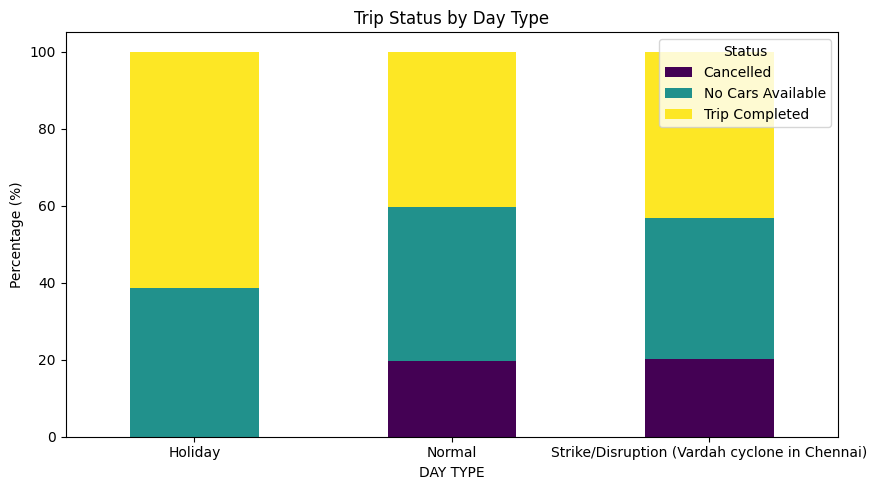

In [82]:
# Chart - 3 visualization code
ob2_ch1 = df.groupby(['DAY TYPE', 'Cleaned_Status'])['Request id'].count().unstack().fillna(0)
ob2_ch1_percent = ob2_ch1.div(ob2_ch1.sum(axis=1), axis=0) * 100

ob2_ch1_percent.plot(kind='bar', stacked=True, figsize=(9, 5), colormap='viridis')
plt.title('Trip Status by Day Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A 100% stacked bar chart allows direct comparison of trip outcome distribution across different day types (Normal, Holiday, Strike).

##### 2. What is/are the insight(s) found from the chart?

1. On Strike/Disruption days, completed trips sharply decline.

2. Holidays see relatively stable but slightly lower completion.

3. Normal days have the best completion-to-cancellation ratio.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Helps in predictive scheduling and driver allocation.
2. If not addressed, unpreparedness on strike days may lead to severe service gaps and customer dissatisfaction.

#### Chart - 4

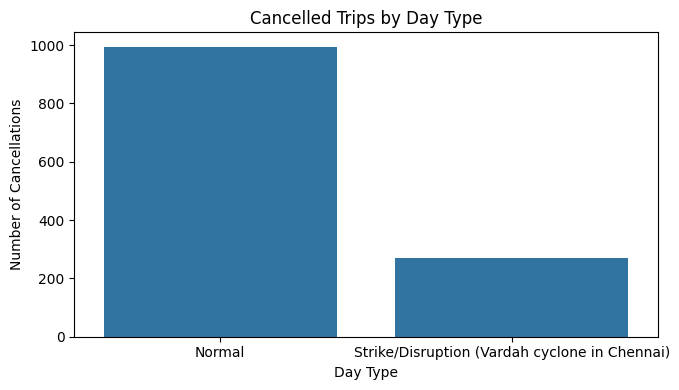

In [83]:
# Chart - 4 visualization code
ob2_ch2 = df[df['Cleaned_Status'] == 'Cancelled']['DAY TYPE'].value_counts()

plt.figure(figsize=(7, 4))
sns.barplot(x=ob2_ch2.index, y=ob2_ch2.values)
plt.title('Cancelled Trips by Day Type')
plt.ylabel('Number of Cancellations')
plt.xlabel('Day Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A simple bar chart was chosen to directly show number of cancellations by DAY TYPE.

##### 2. What is/are the insight(s) found from the chart?

1. Most cancellations occur on normal days (due to higher demand).

2. Strike/Disruption days show fewer requests but poor fulfillment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Encourages maintaining buffer fleets on regular days.
2. Negative impact if strike days aren't mitigated with alerts, alternate transport modes, or increased incentives.

#### Chart - 5

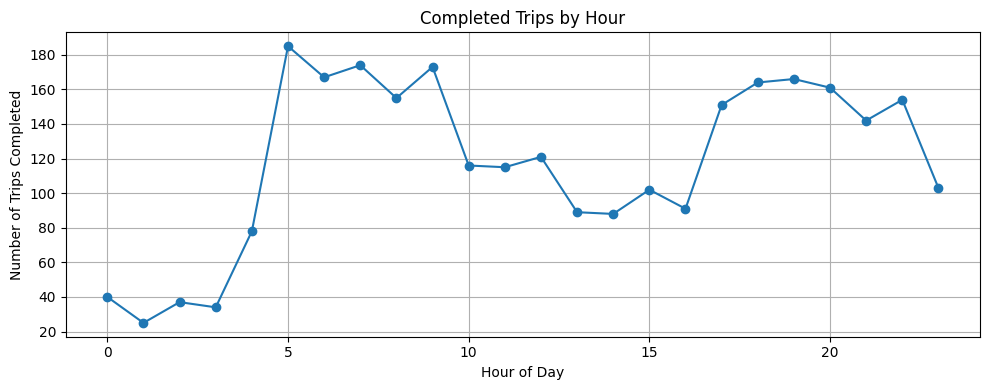

In [84]:
# Chart - 5 visualization code
completed = df[df['Cleaned_Status'] == 'Trip Completed']
ob3_ch1 = completed.groupby('Request Hour')['Request id'].count()

plt.figure(figsize=(10, 4))
plt.plot(ob3_ch1.index, ob3_ch1.values, marker='o')
plt.title('Completed Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips Completed')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart was selected to highlight hourly trends in completed trips — time-based data is best represented with continuous lines.

##### 2. What is/are the insight(s) found from the chart?

1. Completion rates peak at 7–9 AM and 5–8 PM, aligning with commute windows.

2. Midday and late-night activity is low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Use this to maximize driver presence during peak hours.
2. If peak hours are underserved, it can result in missed revenue and poor customer experience.

#### Chart - 6

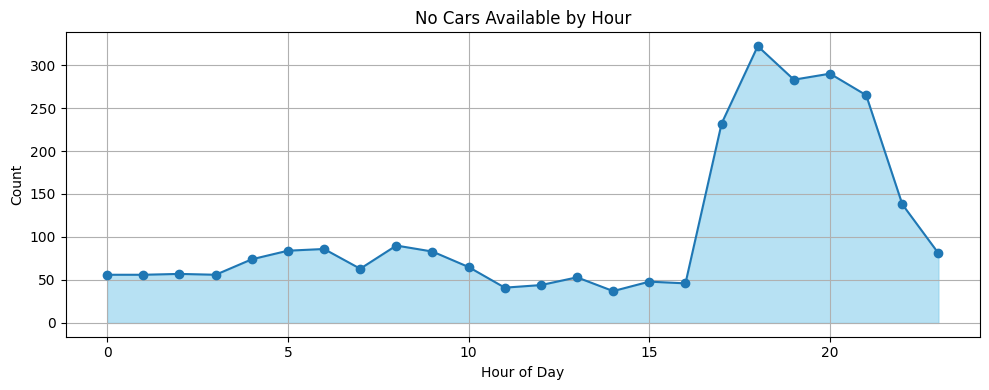

In [85]:
# Chart - 6 visualization code
no_cars = df[df['Cleaned_Status'] == 'No Cars Available']
ob3_ch2 = no_cars.groupby('Request Hour')['Request id'].count()

plt.figure(figsize=(10, 4))
plt.fill_between(ob3_ch2.index, ob3_ch2.values, color='skyblue', alpha=0.6)
plt.plot(ob3_ch2.index, ob3_ch2.values, marker='o')
plt.title('No Cars Available by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

An area chart was chosen to emphasize volume and pattern of unavailability throughout the day — giving more focus to peaks.

##### 2. What is/are the insight(s) found from the chart?

1. “No Cars Available” peaks exactly during high demand hours (AM/PM commute).

2. Mirrors OB3–CH1, highlighting demand-supply imbalance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Enables driver scheduling optimization.
2. A direct threat to user retention. Repeated failure to serve during peak demand can shift users to competitors (like Ola or autos).

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To improve operational efficiency, reduce cancellations, and enhance rider satisfaction, the following data-driven strategies are recommended:

1. Optimize Driver Availability During Peak Hours
Insight: Trip completions and "No Cars Available" events both peak during morning and evening rush hours.

Recommendation:
Implement predictive scheduling and targeted driver incentives during high-demand windows (7–9 AM and 5–9 PM). This will improve service fulfillment, reduce unavailability issues, and increase revenue potential.

2. Address High Cancellation Rates in City Areas
Insight: 84% of all cancellations originate from City pickup points.

Recommendation:
Conduct root cause analysis on urban cancellations. Enhance driver reliability through improved engagement, fair cancellation policies, and potential rider incentives to reduce churn due to failed bookings.

3. Enhance Reliability at Airport Locations
Insight: While accounting for only 16% of cancellations, airports represent a high-value segment with significant request volume.

Recommendation:
Streamline operations at airports with designated pickup lanes, scheduled rides, or priority driver allocation to support business travelers and time-sensitive users.

4. Mitigate Impact of Holidays and Disruptions
Insight: Service fulfillment drops significantly during holidays and strike/disruption days.

Recommendation:
Develop a contingency plan that includes surge pricing control, flexible driver bonuses, and proactive rider communication during predictable disruption events.

5. Leverage Operational Intelligence for Decision-Making
Insight: Variability in demand and fulfillment is consistent across time, location, and context.

Recommendation:
Integrate insights into a live operational dashboard to support regional managers with real-time decision-making, driver shift planning, and service-level monitoring.

# **Conclusion**

The analysis of Uber’s operational data reveals clear patterns in rider demand, service availability, and trip fulfillment across various times and locations. High cancellation rates in city areas, peak-hour unavailability, and service disruption during holidays and strikes are key challenges currently affecting performance and customer satisfaction.

By adopting data-driven strategies—such as optimizing driver availability during rush hours, improving reliability in high-demand zones, and proactively managing service disruptions—Uber can significantly enhance its operational efficiency and user experience.

Addressing these areas will not only reduce lost revenue opportunities but also strengthen brand trust and customer loyalty. These insights provide a solid foundation for strategic decision-making that aligns with Uber's long-term goals of scalability, service reliability, and market leadership.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***